In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
pd_data_train = pd.read_csv("./training_set.csv")
pd_data_test = pd.read_csv("./test_set.csv")

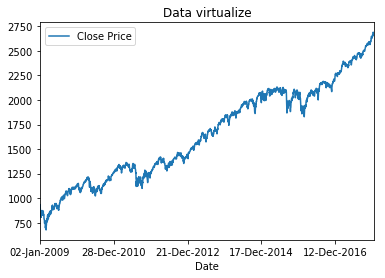

In [3]:
# data virtualization
pd_data_train.plot(x='Date', y='Close Price', title='Data virtualize')
plt.show()

In [4]:
print( numpy.isnan((pd_data_train).any()) )
print( numpy.isnan((pd_data_test).any()) )

Date           False
Open Price     False
Close Price    False
High Price     False
Low Price      False
Volume         False
dtype: bool
Date           False
Open Price     False
Close Price    False
High Price     False
Low Price      False
Volume         False
dtype: bool


In [5]:
pd_data_train.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [6]:
# Use lambda to implement switch
switcher_month = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12',
}
print(pd_data_train['Date'][0][3:6])
print(switcher_month.get(pd_data_train['Date'][0][3:6]))

Jan
01


In [7]:
# data preprocecing
pd_data_train_y = numpy.zeros(pd_data_train.shape[0], dtype = 'int')

for i in range(0, pd_data_train.shape[0]) :
    tmp = pd_data_train['Date'][i]
    pd_data_train.at[i, 'Date'] = tmp[7:11] + switcher_month.get(tmp[3:6]) + tmp[0:2]
    if i != 0:
        prev = pd_data_train.at[i-1, 'Close Price']
        cur = pd_data_train.at[i, 'Close Price']
        if prev > cur :
            pd_data_train_y[i] = 0
        else :
            pd_data_train_y[i] = 1

pd_data_train.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,20090102,902.99,931.80,934.73,899.35,4048270080
1,20090105,929.17,927.45,936.63,919.53,5413910016
2,20090106,931.17,934.70,943.85,927.28,5392620032
3,20090107,927.45,906.65,927.45,902.37,4704940032
4,20090108,905.73,909.73,910.00,896.81,4991549952


In [8]:
pd_data_train_y = pd.DataFrame(pd_data_train_y, columns=['result'])
pd_data_train_y.head(5)

,result
0,0
1,0
2,1
3,0
4,1


In [9]:
pd_data_train_x = pd_data_train[['Date']]
# Because cann't get data of 2009/01/01, so the result of 2009/01/02 is unknowm
pd_data_train_x = pd_data_train_x.drop([0])
pd_data_train_y = pd_data_train_y.drop([0])
pd_data_train_y.head(5)

,result
1,0
2,1
3,0
4,1
5,0


In [10]:
pd_data_test_y = numpy.zeros(pd_data_test.shape[0], dtype = 'int')

for i in range(0, pd_data_test.shape[0]) :
    tmp = pd_data_test['Date'][i]
    pd_data_test.at[i, 'Date'] = tmp[7:11] + switcher_month.get(tmp[3:6]) + tmp[0:2]
    if i != 0:
        prev = pd_data_test.at[i-1, 'Close Price']
        cur = pd_data_test.at[i, 'Close Price']
        if prev > cur :
            pd_data_test_y[i] = 0
        else :
            pd_data_test_y[i] = 1

pd_data_test.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,20180102,2683.73,2695.81,2695.89,2682.36,1846463232
1,20180103,2697.85,2713.06,2714.37,2697.77,2090595328
2,20180104,2719.31,2723.99,2729.29,2719.07,2100767744
3,20180105,2731.33,2743.15,2743.45,2727.92,1918869120
4,20180108,2742.67,2747.71,2748.51,2737.60,1894823936


In [11]:
pd_data_test_y = pd.DataFrame(pd_data_test_y, columns=['result'])
pd_data_test_y.head(5)
pd_data_test_x = pd_data_test[['Date']]
# Because cann't get data of 2018/01/01, so the result of 2018/01/02 is unknowm
pd_data_test_x = pd_data_test_x.drop([0])
pd_data_test_y = pd_data_test_y.drop([0])
pd_data_test_y.head(5)

,result
1,1
2,1
3,1
4,1
5,1


In [12]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag')

model = model.fit (pd_data_train_x,pd_data_train_y['result'])
model.score(pd_data_test_x,pd_data_test_y['result'])

0.5258964143426295

In [13]:
model.predict(pd_data_test_x)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.svm import SVC
model = SVC(gamma='auto', degree=1, class_weight='balanced')

model = model.fit (pd_data_train_x,pd_data_train_y['result'])
model.score(pd_data_test_x,pd_data_test_y['result'])

0.5258964143426295

In [15]:
model.predict(pd_data_test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(15,2), random_state=1)

model = model.fit (pd_data_train_x,pd_data_train_y['result'])
model.score(pd_data_test_x,pd_data_test_y['result'])

0.5258964143426295

In [17]:
model.predict(pd_data_test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])